In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the Library for Project
import os
import sys
import time
import kaggle
import random
import subprocess
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from sklearn.feature_selection import chi2
from scipy.stats import chisquare, chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 


In [3]:
fontconf = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
#plt.rcParams.update({"lines.color": "white","patch.edgecolor": "white","text.color": "black","axes.facecolor": "white","axes.edgecolor": "lightgray", "axes.labelcolor": "white","xtick.color": "white","ytick.color": "white","grid.color": "lightgray","figure.facecolor": "black","figure.edgecolor": "black","savefig.facecolor": "black","savefig.edgecolor": "black"})

In [4]:
# Requirement to be installed in this project
"""
!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install scipy
!pip3 install sklearn
!pip3 install xgboost
!pip3 install kaggle
"""

'\n!pip3 install numpy\n!pip3 install pandas\n!pip3 install seaborn\n!pip3 install matplotlib\n!pip3 install scipy\n!pip3 install sklearn\n!pip3 install xgboost\n!pip3 install kaggle\n'

In [5]:
# Downloading the dataset : 
# Download kaggle.json file from Kaggle account setting, API token, and it will has userid
#and key
#kaggle.api.dataset_download_files('alexteboul/diabetes-health-indicators-dataset', unzip=True) 

### The Health Indicator Diabetes Dataset has 3 files. I have listed them below :
    - File1 : Diabetes_binary_health
    - File2 : Diabetes_012_health
    - File3 : Diabetes_binary_5050split_health

We are going to perform a reading, cleaning of the dataset, and check which files are suitable to build the model
for diabetes prediction in general if we have given parameters as input.

In [6]:
file1 = "diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv"
file2 = "diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv"
file3 = "diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

## Testing on File 1:

### Reading the file the File

In [7]:
file1 = "diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv"
df1 = pd.read_csv(file1)
print(f'The shape of dataset in file1: is  {df1.shape}')
print(f'Unique Classes in the file1: {np.unique(df1.Diabetes_binary).size} classes')
# print out and display dataframe as tables in HTML
display(HTML(df1.head(5).to_html()))

The shape of dataset in file1: is  (253680, 22)
Unique Classes in the file1: 2 classes


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Cleaning the file if missing values are there

In [8]:
#checking if any column has missing values
for column in df1.columns:
    print(f'{column:25} : {df1[column].isna().sum():3}')
    
    # if null values are in any given column, remove those rows
    if np.sum(df1[column].isna()) > 0 :
        df1[column].dropna(inplace=True)

# Renaming the column to make standard output column as Diabetes
df1.rename(columns = {'Diabetes_012':'Diabetes', 'Diabetes_binary' : 'Diabetes'}, inplace = True)

Diabetes_binary           :   0
HighBP                    :   0
HighChol                  :   0
CholCheck                 :   0
BMI                       :   0
Smoker                    :   0
Stroke                    :   0
HeartDiseaseorAttack      :   0
PhysActivity              :   0
Fruits                    :   0
Veggies                   :   0
HvyAlcoholConsump         :   0
AnyHealthcare             :   0
NoDocbcCost               :   0
GenHlth                   :   0
MentHlth                  :   0
PhysHlth                  :   0
DiffWalk                  :   0
Sex                       :   0
Age                       :   0
Education                 :   0
Income                    :   0


### Checking the Number of casees Present of Diabetes Vs Non-Diabetes

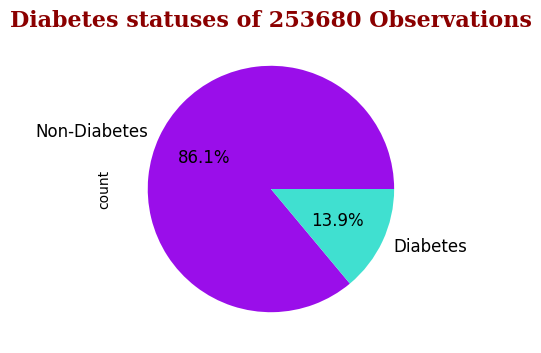

In [9]:
plt.figure(figsize=(8,6))
axes = df1.Diabetes.value_counts().plot.pie(autopct='%1.1f%%', fontsize=12, figsize=(4,4),colors=['#9A0EEA','#40E0D0'],labels=['Non-Diabetes','Diabetes'])
axes.set_title("Diabetes statuses of {} Observations".format(df1.shape[0]), fontdict=fontconf)
plt.savefig('1.png')

    In File 1, we have Non-Diabetes patients present at 86.1 % and Diabetes present at 13.9%. It's not a balanced dataset, for building the Machine Learning model for predicting diabetes in patients becomes more biased toward Non-diabetes patients.

## Testing on File 2:

### Reading the file the File

In [10]:
file2 = "diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv"
df2 = pd.read_csv(file2)
print(f'The shape of dataset in file2: is  {df2.shape}')
print(f'Unique Classes in the file2: {np.unique(df2.Diabetes_012).size} classes')
# print out and display dataframe as tables in HTML
display(HTML(df2.head(5).to_html()))

The shape of dataset in file2: is  (253680, 22)
Unique Classes in the file2: 3 classes


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Cleaning the file if missing values are there

In [11]:
#checking if any column has missing values
for column in df2.columns:
    print(f'{column:25} : {df2[column].isna().sum():3}')
    
    # if null values are in any given column, remove those rows
    if np.sum(df2[column].isna()) > 0 :
        df2[column].dropna(inplace=True)

# Renaming the column to make standard output column as Diabetes
df2.rename(columns = {'Diabetes_012':'Diabetes', 'Diabetes_binary' : 'Diabetes'}, inplace = True)

Diabetes_012              :   0
HighBP                    :   0
HighChol                  :   0
CholCheck                 :   0
BMI                       :   0
Smoker                    :   0
Stroke                    :   0
HeartDiseaseorAttack      :   0
PhysActivity              :   0
Fruits                    :   0
Veggies                   :   0
HvyAlcoholConsump         :   0
AnyHealthcare             :   0
NoDocbcCost               :   0
GenHlth                   :   0
MentHlth                  :   0
PhysHlth                  :   0
DiffWalk                  :   0
Sex                       :   0
Age                       :   0
Education                 :   0
Income                    :   0


### Checking the Number of casees Present of Diabetes Vs Non-Diabetes

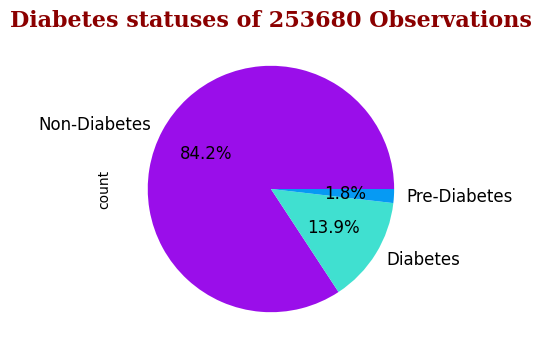

In [12]:
plt.figure(figsize=(8,6))
axes = df2.Diabetes.value_counts().plot.pie(autopct='%1.1f%%', fontsize=12, figsize=(4,4),colors=['#9A0EEA','#40E0D0','#069AF3'],labels=['Non-Diabetes','Diabetes', 'Pre-Diabetes'])
axes.set_title("Diabetes statuses of {} Observations".format(df2.shape[0]), fontdict=fontconf)
plt.savefig('2.png')

    In File 2, There are 3 classes presented as Diabetes, Non-Diabetes, and Pre-Diabetes. We have Non-Diabetes patients present at 84.2 %, Pre-diabetes patients present at 1.8%, and Diabetes present at 13.9%. It's not a balanced dataset, for building the Machine Learning model for predicting diabetes in patients becomes more biased toward Non-diabetes patients.

## Testing on File 3:

### Reading the file the File

In [13]:
file3 = "diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
df3 = pd.read_csv(file3)
print(f'The shape of dataset in file3: is  {df3.shape}')
print(f'Unique Classes in the file3: {np.unique(df3.Diabetes_binary).size} classes')
# print out and display dataframe as tables in HTML
display(HTML(df3.head(5).to_html()))

The shape of dataset in file3: is  (70692, 22)
Unique Classes in the file3: 2 classes


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### Cleaning the file if missing values are there

In [14]:
#checking if any column has missing values
for column in df3.columns:
    print(f'{column:25} : {df3[column].isna().sum():3}')
    
    # if null values are in any given column, remove those rows
    if np.sum(df3[column].isna()) > 0 :
        df3[column].dropna(inplace=True)

# Renaming the column to make standard output column as Diabetes
df3.rename(columns = {'Diabetes_012':'Diabetes', 'Diabetes_binary' : 'Diabetes'}, inplace = True)

Diabetes_binary           :   0
HighBP                    :   0
HighChol                  :   0
CholCheck                 :   0
BMI                       :   0
Smoker                    :   0
Stroke                    :   0
HeartDiseaseorAttack      :   0
PhysActivity              :   0
Fruits                    :   0
Veggies                   :   0
HvyAlcoholConsump         :   0
AnyHealthcare             :   0
NoDocbcCost               :   0
GenHlth                   :   0
MentHlth                  :   0
PhysHlth                  :   0
DiffWalk                  :   0
Sex                       :   0
Age                       :   0
Education                 :   0
Income                    :   0


### Checking the Number of casees Present of Diabetes Vs Non-Diabetes

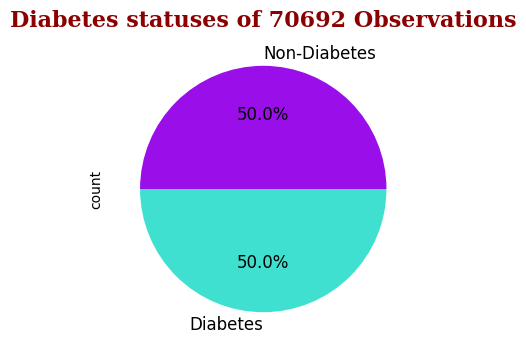

In [15]:
plt.figure(figsize=(8,6))
axes = df3.Diabetes.value_counts().plot.pie(autopct='%1.1f%%', fontsize=12, figsize=(4,4),colors=['#9A0EEA','#40E0D0'],labels=['Non-Diabetes','Diabetes'])
axes.set_title("Diabetes statuses of {} Observations".format(df3.shape[0]), fontdict=fontconf)
plt.savefig('3.png')

    In  File 3, we have Non-Diabetes patients present at 50 % and Diabetes present at 50%. It's a balanced dataset. It's perfect to build the Machine Learning model for predicting diabetes in patients.

## **Studying individual features (columns) which may have influence the Diabetes.**

#### **Plotting all Binary Columns**

In [16]:
sns.set(color_codes=True)

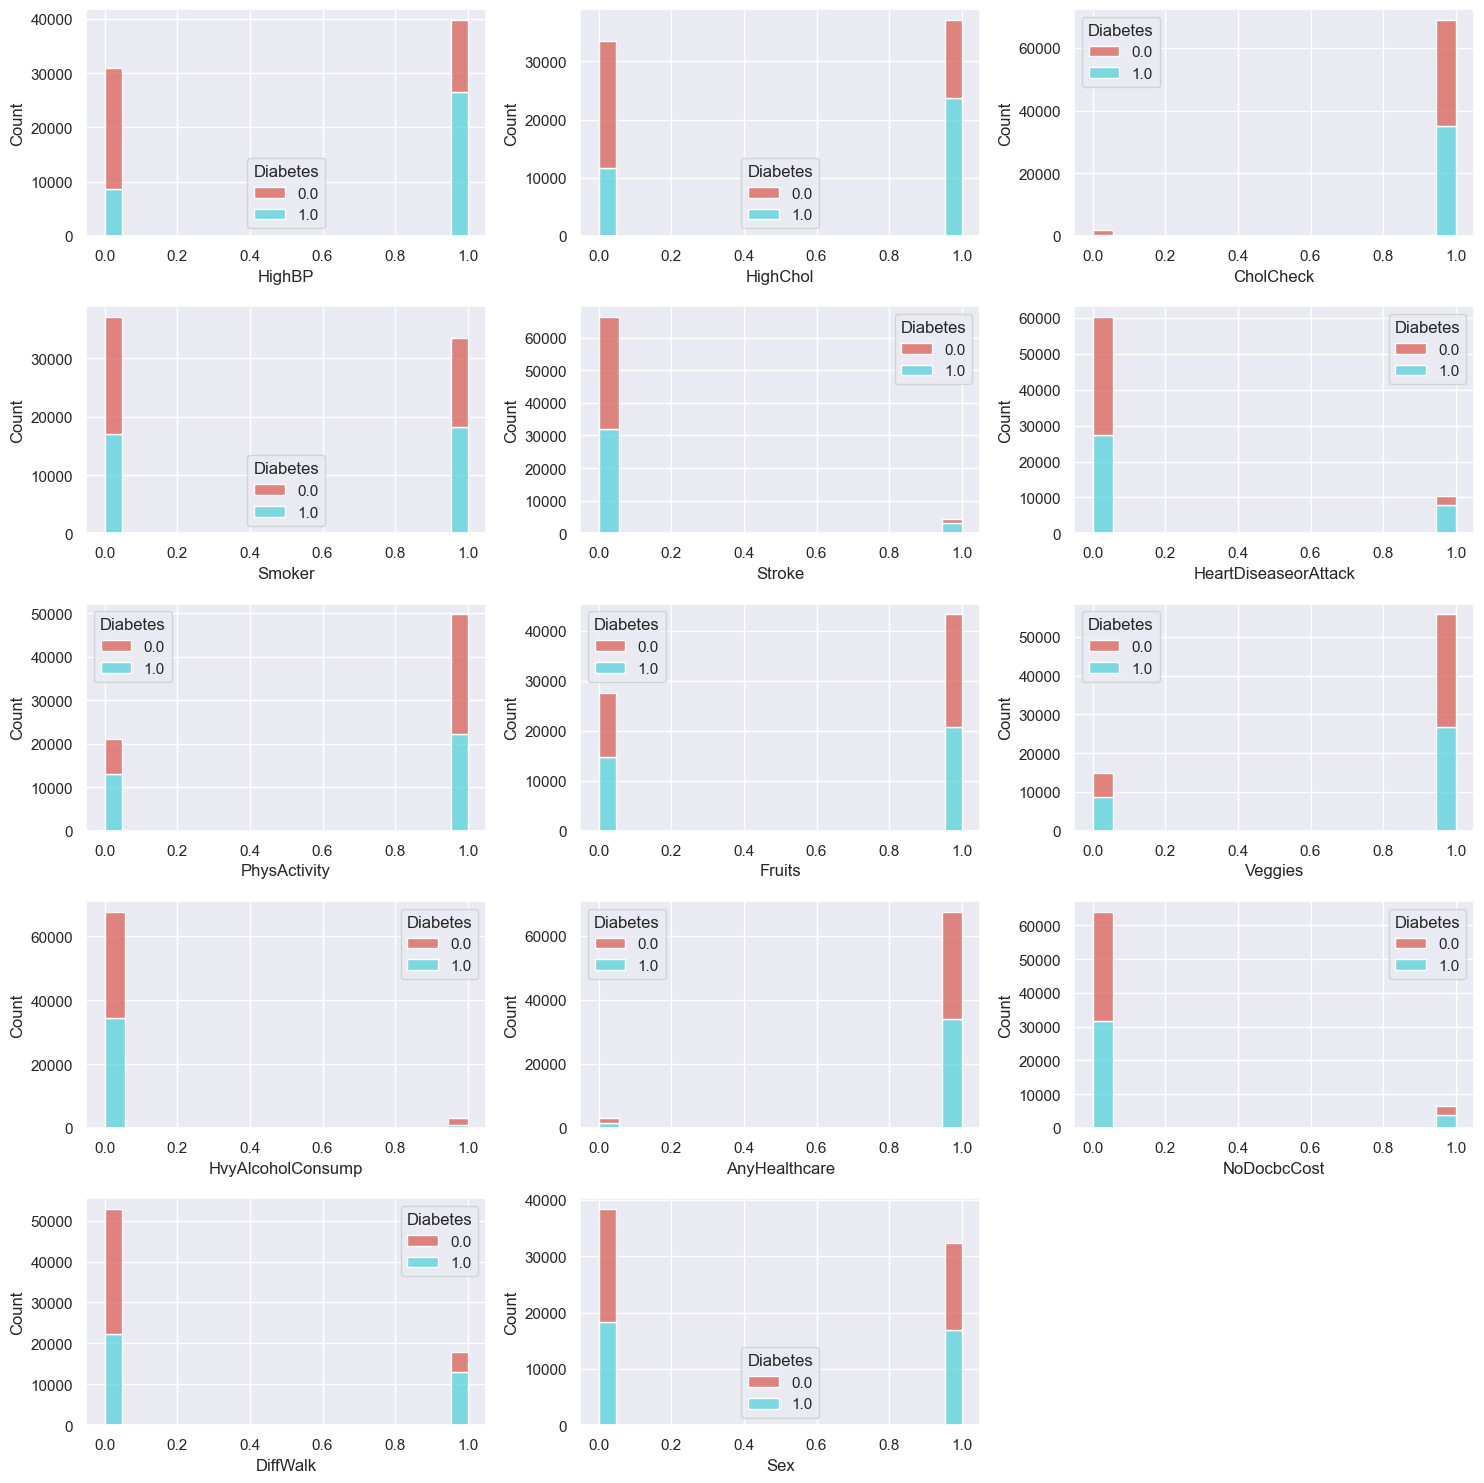

In [17]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
        'Veggies','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk','Sex']
plt.figure(figsize = (15,15))
for i,col in enumerate(cols):
    plt.subplot(5,3,i+1)
    sns.histplot(data=df3, x = col, palette='hls',hue='Diabetes', multiple="stack")
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.0, top=0.6, wspace=0.6)
plt.tight_layout()
plt.savefig('4.png')

#### **Plotting all Non-Binary Columns**

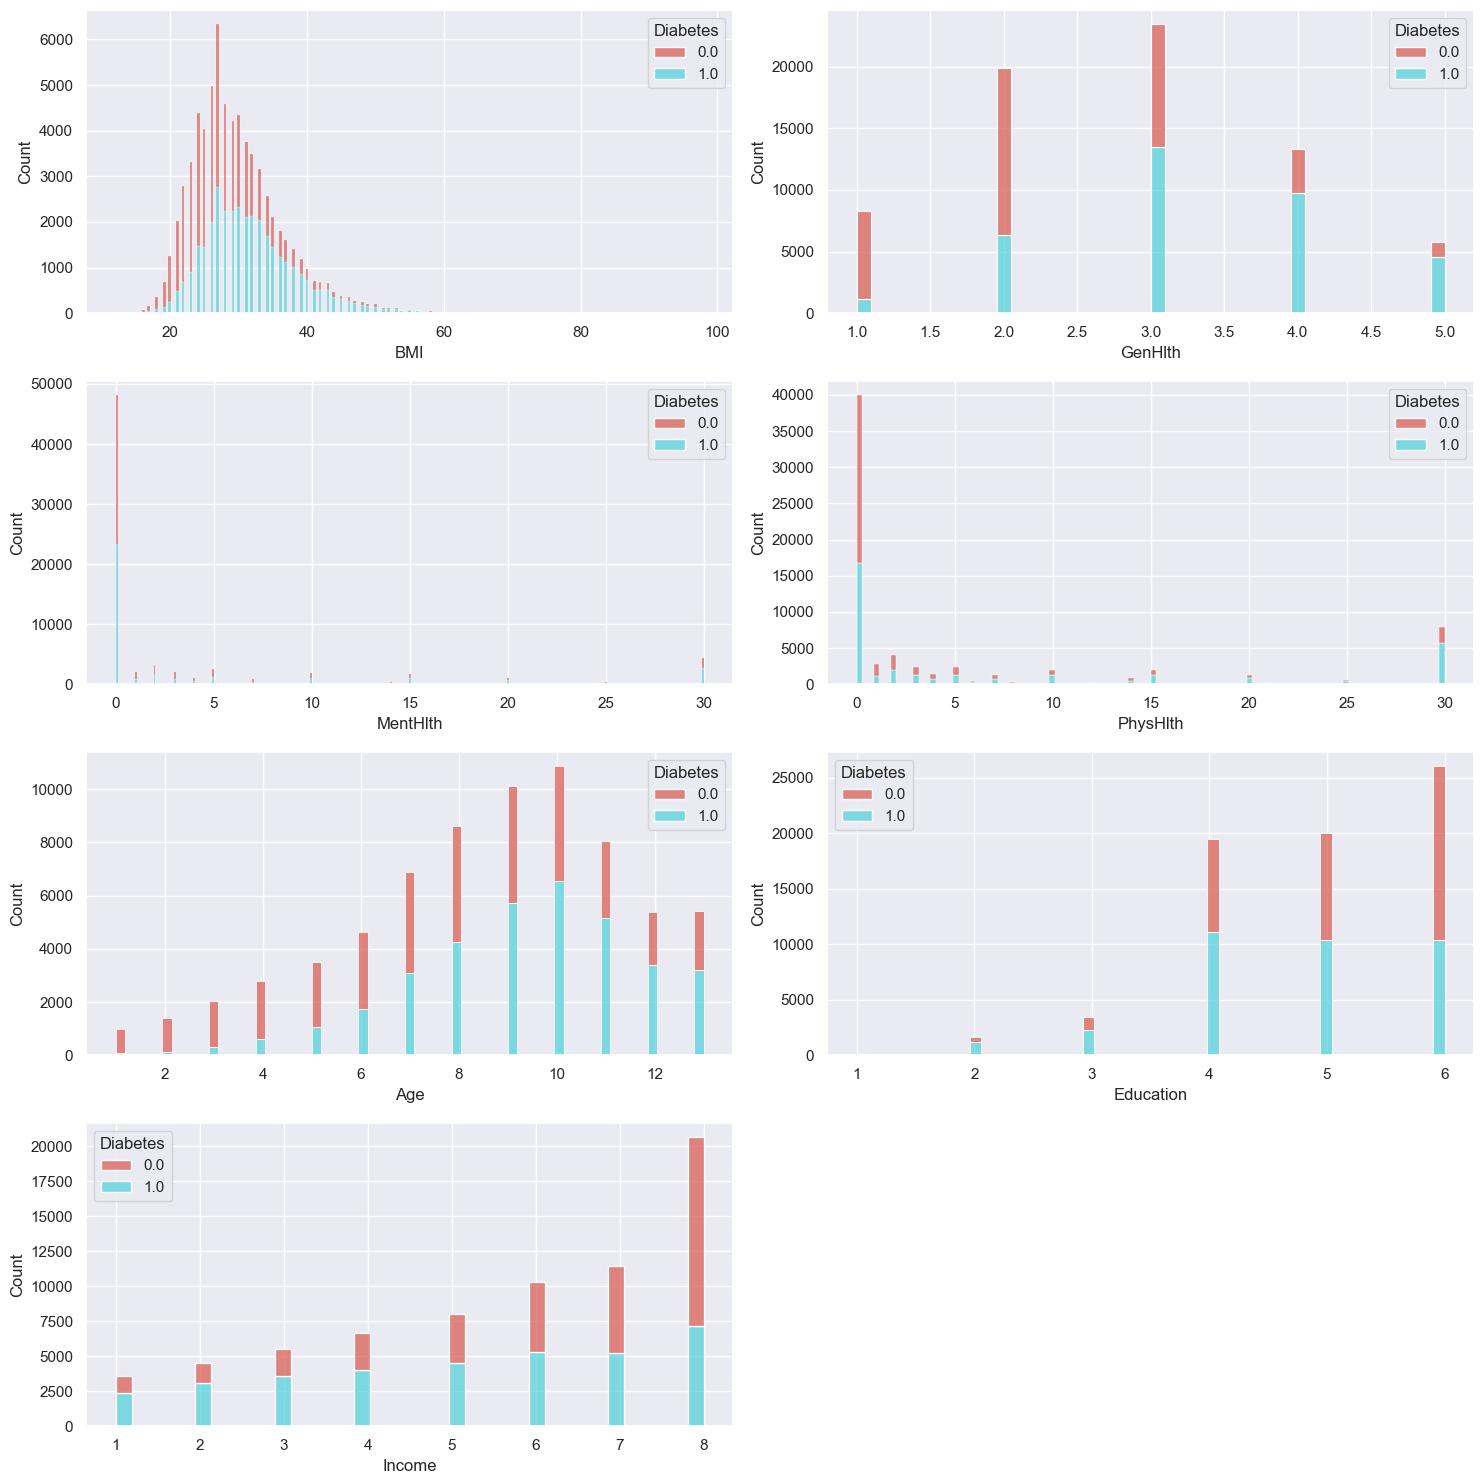

In [18]:
cols = ['BMI', 'GenHlth','MentHlth', 'PhysHlth', 'Age', 'Education','Income']
plt.figure(figsize = (15,15))
for i,col in enumerate(cols):
    plt.subplot(4,2,i+1)
    sns.histplot(data=df3,x = col,palette="hls",hue='Diabetes',multiple="stack")
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.0, top=1.2, wspace=0.6)
plt.tight_layout()
plt.savefig('5.png')

### Displaying data statstics for Non-Binary indicators

In [19]:
cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education','Income']
df3[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
GenHlth,70692.0,2.837082,1.113565,1.0,2.0,3.0,4.0,5.0
MentHlth,70692.0,3.752037,8.155627,0.0,0.0,0.0,2.0,30.0
PhysHlth,70692.0,5.810417,10.062261,0.0,0.0,0.0,6.0,30.0
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Education,70692.0,4.920953,1.029081,1.0,4.0,5.0,6.0,6.0
Income,70692.0,5.698311,2.175196,1.0,4.0,6.0,8.0,8.0


### Checking the outliers for non-binary columns 

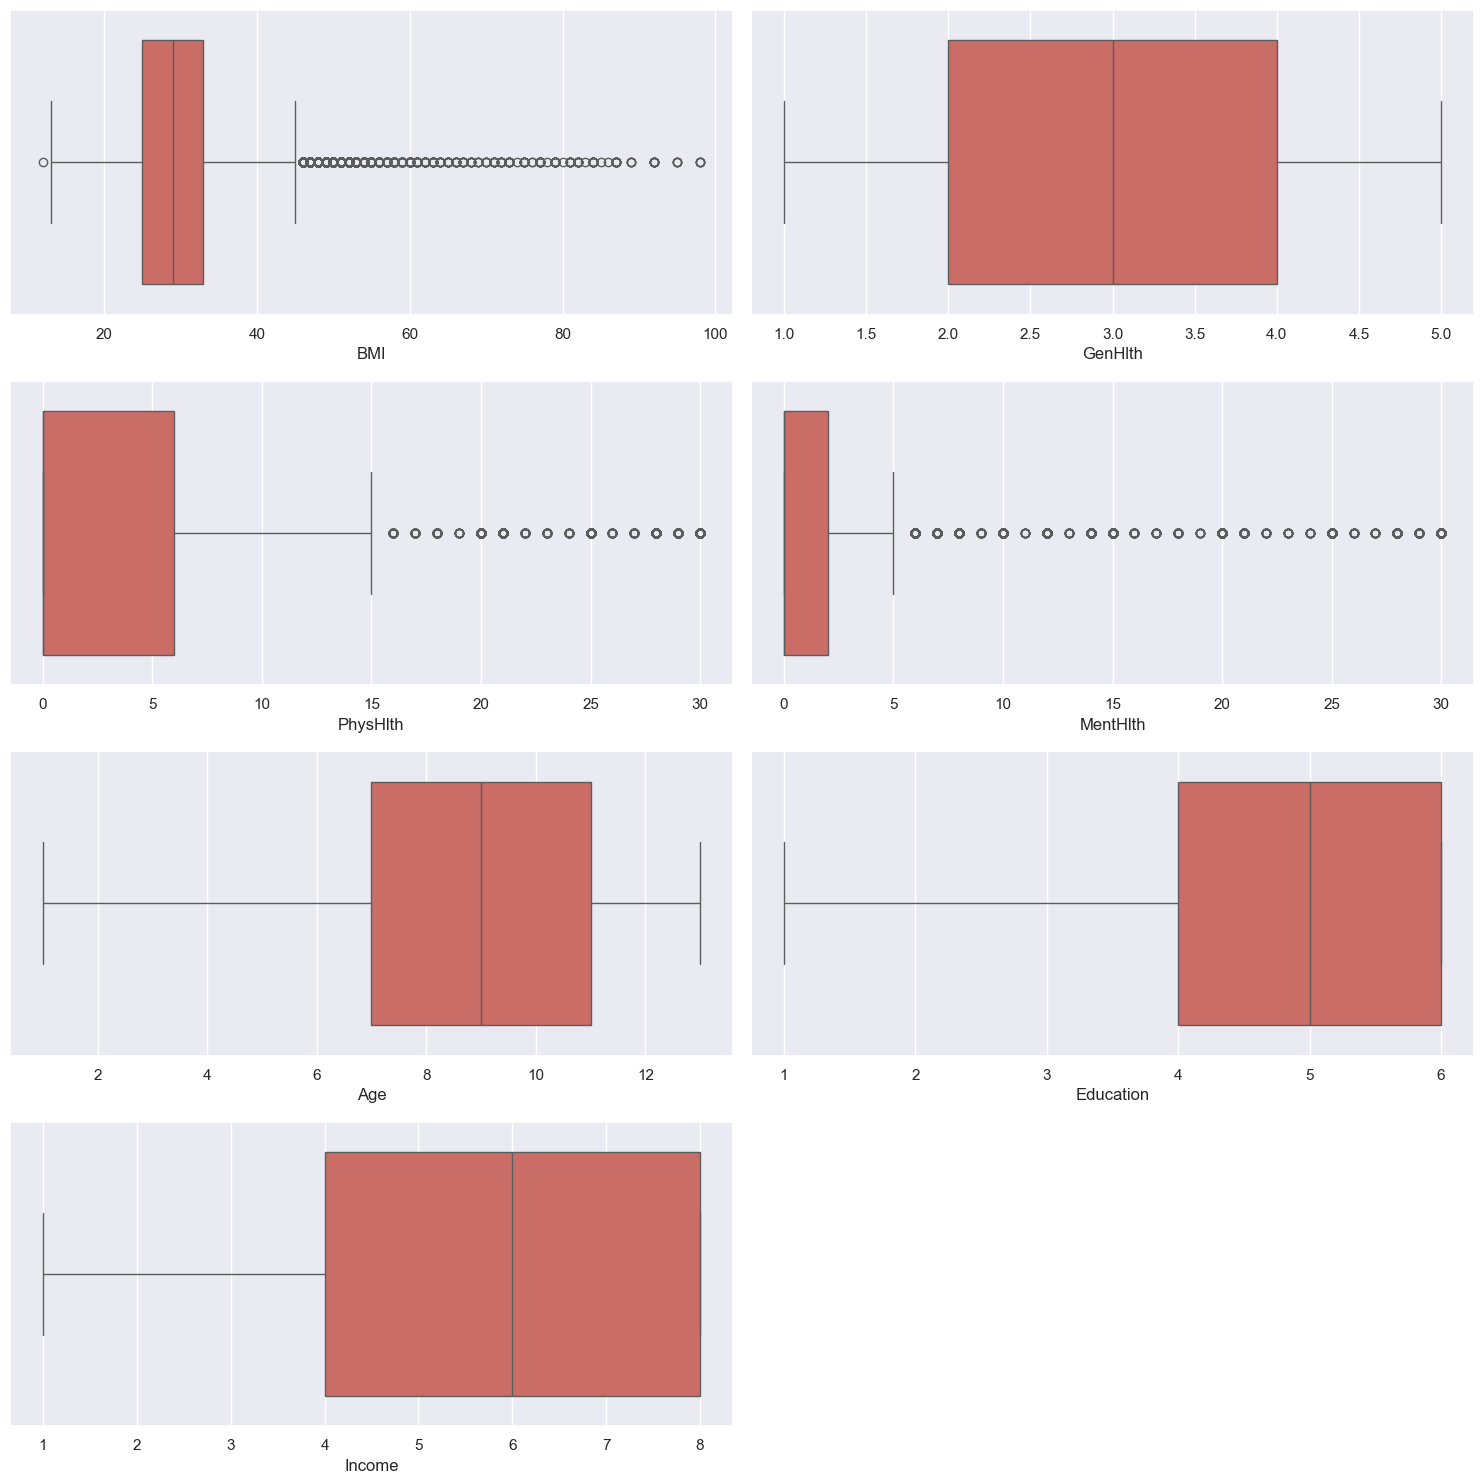

In [20]:
plt.figure(figsize = (15,15))
for i,col in enumerate([ 'BMI', 'GenHlth','PhysHlth','MentHlth', 'Age', 'Education','Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df3,x = col,palette="hls")
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.0, top=1.2, wspace=0.6)
plt.tight_layout()
plt.savefig('6.png')

    From the boxplot, the BMI, PhysHlth and MentHlth Factors  have outliers in File3 samples. We can remove the outliers or keep them for making the ML models.

### Check The Correlation between each column of the dataset

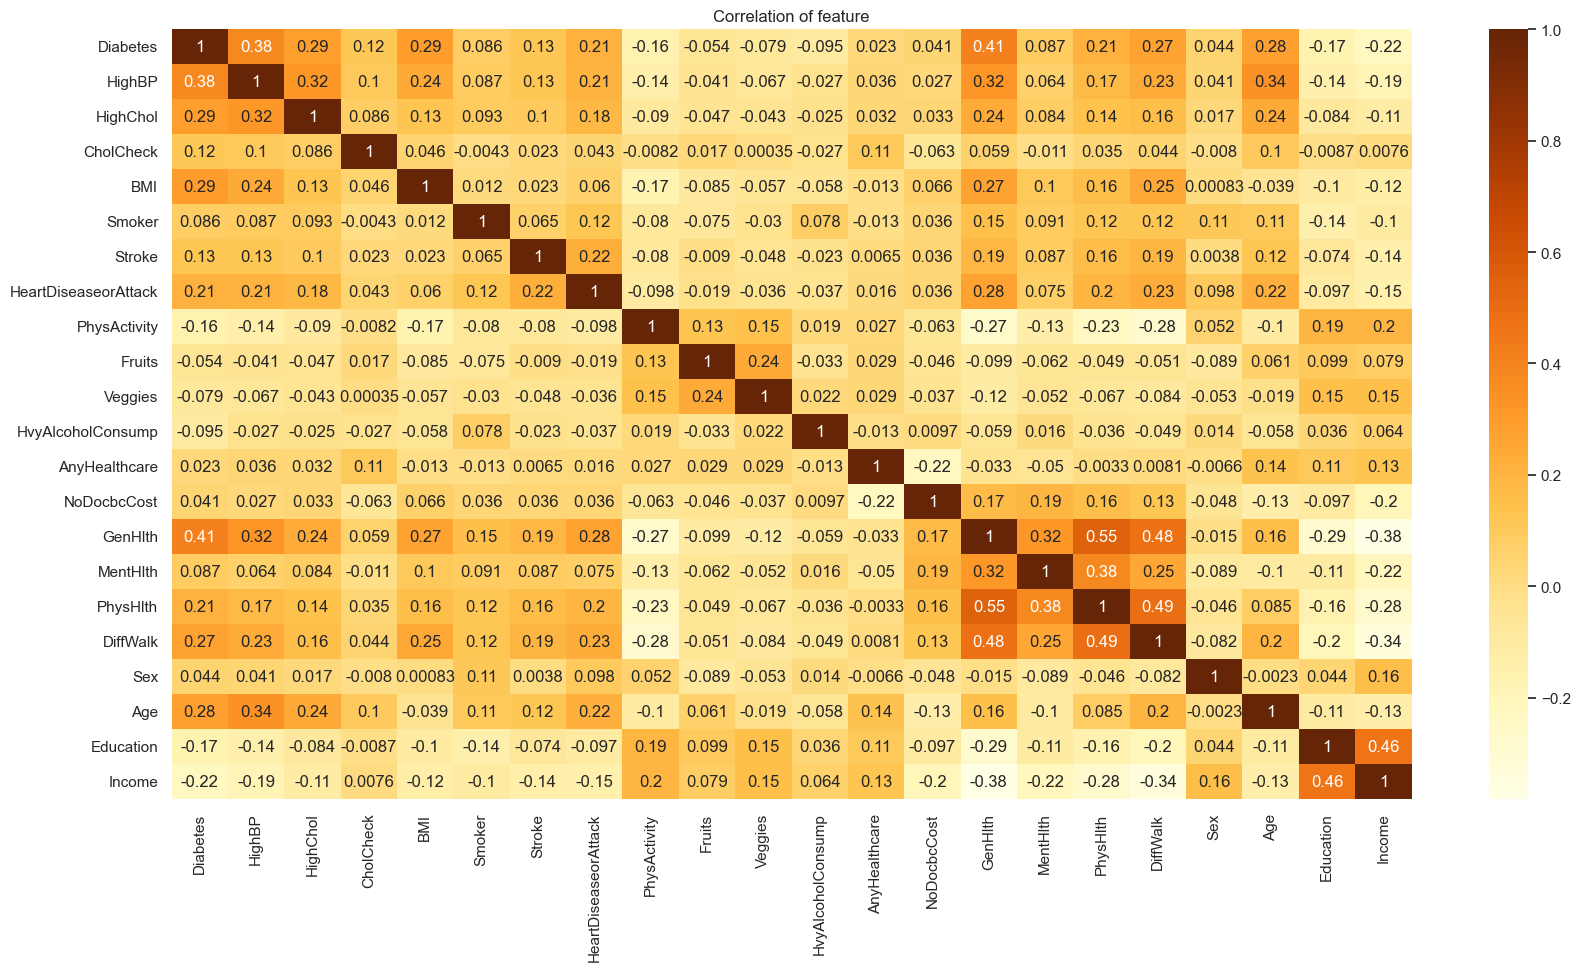

In [21]:
#using heatmap to understand correlation better in dataset data w.r.to Diabetes
plt.figure(figsize = (20,10))
sns.heatmap(df3.corr(), annot=True,cmap="YlOrBr")
plt.title("Correlation of feature")
plt.savefig('7.png')

### Top 10  prominent indicators which is highly Correlated Factors with Diabetes 

In [22]:
v = df3.corr()
indicatorList = [ (df3.columns[index],v.Diabetes[df3.columns[index]]) for index in range(0,len(v.Diabetes)) ]
sortedIndicatorList = sorted(indicatorList, key = lambda x : x[1],reverse=True)[1:11]
sortedIndicatorList

[('GenHlth', 0.40761159849491824),
 ('HighBP', 0.3815155489073118),
 ('BMI', 0.2933727447610357),
 ('HighChol', 0.2892128070886501),
 ('Age', 0.2787380662818883),
 ('DiffWalk', 0.272646006159808),
 ('PhysHlth', 0.21308101903810314),
 ('HeartDiseaseorAttack', 0.2115234043602268),
 ('Stroke', 0.12542678468516733),
 ('CholCheck', 0.11538161710270889)]

### Checking Non Binary prominent variables 

#### **Q : Age Vs Diabetes ?**

<Figure size 1000x600 with 0 Axes>

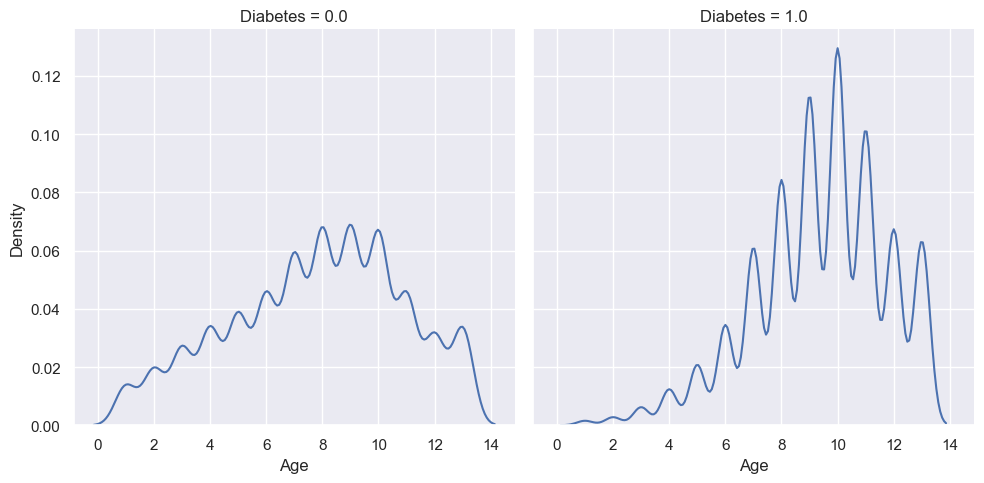

In [23]:
plt.figure(figsize=(10,6))
sns.displot(data=df3, x='Age',col='Diabetes',kind='kde')
plt.savefig('8.png')

### Observation
   As we observe, patients have more chances of becoming diabetic as their age is more...from 6 to 13 from the plot.

### Bi-variate Analysis¶

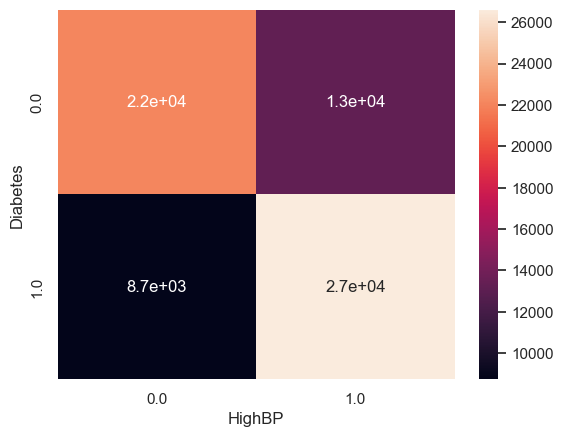

In [24]:
sns.heatmap(pd.crosstab(df3['Diabetes'], df3['HighBP']), annot=True);
plt.savefig('9.png')

#### Observation
There is a very high chance that a patient becomes diabetes who has already High BP.

## Diagonistics Analysis¶


In this analysis, we'll look at how different factors relate to whether a patient has autism or not by utilizing the Chi-Square method.

Note: Finding relationships between categorical data via correlation is one of data science's pitfalls.

Formulate our hypothesis
    
    > H0 - The feature did not have significance difference with Diabetes class, It happened just by chance.

    > H1 - The feature checked have significant difference with Diabetes class and evidence and statistics about it.

If the p-value is > 0.05 hence the feature did not have significance effect on Diabetes class and vice versa.

In [25]:
## Stastical test

# setting significance to 0.05
significance = 0.05 

def check_ChiSquareAnalysis(var1, var2, significance_level=0.05):
    tab_class = pd.crosstab(df3[var1], df3[var2], margins=True)
    tab_values = np.array([tab_class.iloc[0].values, tab_class.iloc[1].values])
    
    stat, p, dof, expected_value = chi2_contingency(tab_values)
    
    print(f"p value: {p}") 
    
    if p > significance_level: 
        print('Accept Null Hypothesis')
    else:
        print('Reject NULL HYPOTHESIS') 
        #print('Accepting the Alternative hypothesis')
   

In [26]:
#factors to analysys
check_ChiSquareAnalysis('HighBP', 'HighChol')
check_ChiSquareAnalysis('HighBP', 'Diabetes')
check_ChiSquareAnalysis('HighChol', 'Diabetes')
check_ChiSquareAnalysis('CholCheck', 'HighChol')

p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS
p value: 0.0
Reject NULL HYPOTHESIS
p value: 3.283022789566787e-114
Reject NULL HYPOTHESIS


### Running the Chi2 analysis for all the health indicators together

In [27]:
X = df3.drop('Diabetes', axis=1)
y = df3['Diabetes']

#computing f score and p value 
f_score = chi2(X,y)   
p_value = pd.Series(f_score[1],index=X.columns)
p_value.sort_values(ascending=True,inplace=True)
print(p_value)

HighBP                   0.000000e+00
Age                      0.000000e+00
DiffWalk                 0.000000e+00
PhysHlth                 0.000000e+00
MentHlth                 0.000000e+00
GenHlth                  0.000000e+00
Income                   0.000000e+00
BMI                      0.000000e+00
HighChol                 0.000000e+00
HeartDiseaseorAttack     0.000000e+00
Stroke                  8.183772e-229
HvyAlcoholConsump       1.987141e-134
PhysActivity            6.005937e-117
Education                3.696389e-98
Smoker                   1.285045e-61
NoDocbcCost              3.372739e-25
Veggies                  3.346521e-22
Fruits                   3.297706e-19
Sex                      3.274662e-18
CholCheck                1.397365e-06
AnyHealthcare            1.906756e-01
dtype: float64


In [28]:
p_value_features = p_value.reset_index().rename(columns={'index':'features', 0:'p_value'})
p_value_features['Decision'] = np.where(p_value_features['p_value'] < significance, 'Reject Null Hypothesis', 'Accept Null Hypothesis')

In [29]:
p_value_features

,features,p_value,Decision
0,HighBP,0.000000e+00,Reject Null Hypothesis
1,Age,0.000000e+00,Reject Null Hypothesis
2,DiffWalk,0.000000e+00,Reject Null Hypothesis
3,PhysHlth,0.000000e+00,Reject Null Hypothesis
4,MentHlth,0.000000e+00,Reject Null Hypothesis
5,GenHlth,0.000000e+00,Reject Null Hypothesis
6,Income,0.000000e+00,Reject Null Hypothesis
7,BMI,0.000000e+00,Reject Null Hypothesis
8,HighChol,0.000000e+00,Reject Null Hypothesis
9,HeartDiseaseorAttack,0.000000e+00,Reject Null Hypothesis


#### Feature Importance of the variables :

In [30]:
clf = RandomForestClassifier(n_estimators=50)

In [31]:
clf.fit(X,y)

RandomForestClassifier(n_estimators=50)

In [32]:
clf.feature_importances_

array([0.07005852, 0.03859332, 0.00576337, 0.17160729, 0.02935886,
       0.01034765, 0.02224108, 0.02294808, 0.02842495, 0.02144549,
       0.00925443, 0.00757553, 0.01209295, 0.10448407, 0.05219493,
       0.06937348, 0.02921922, 0.02617482, 0.128382  , 0.05658704,
       0.08387292])

In [33]:
X.columns[clf.feature_importances_ > 0.05]

Index(['HighBP', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income'],
      dtype='object')

#### **Most Relevant Features are From the above Feature Relevance, we can observe that all Non-binary Columns have the high Significance with Diabetic  Variable**

#### Selecting only Relevance Features

In [34]:
ndf = X[X.columns[clf.feature_importances_ > 0.05]]
ndf.head()

,HighBP,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,1.0,26.0,3.0,5.0,30.0,4.0,6.0,8.0
1,1.0,26.0,3.0,0.0,0.0,12.0,6.0,8.0
2,0.0,26.0,1.0,0.0,10.0,13.0,6.0,8.0
3,1.0,28.0,3.0,0.0,3.0,11.0,6.0,8.0
4,0.0,29.0,2.0,0.0,0.0,8.0,5.0,8.0


### Experiment 1 : Performance after removing Outliers

In [35]:
print("*"*70)
print("{:30} : {:5} - {:5} : {:5} : {:5} " .format("Column","25 P", "75 P", "MinIQR", "MaxIQR"))
print("*"*70)

for column in ndf.columns:
    q75,q25 = np.percentile(ndf.loc[:,column],[75,25])
    intr_qr = q75-q25
    maxIQR = q75+(1.5*intr_qr)
    minIQR = q25-(1.5*intr_qr)
    print(f"{column:30} : {q25:5.1f} - {q75:5.1f} : {minIQR:5.1f} : {maxIQR:5.1f}")
    ndf.loc[ ndf[column] > maxIQR, column] = np.nan
    ndf.loc[ ndf[column] < minIQR, column] = np.nan

**********************************************************************
Column                         : 25 P  - 75 P  : MinIQR : MaxIQR 
**********************************************************************
HighBP                         :   0.0 -   1.0 :  -1.5 :   2.5
BMI                            :  25.0 -  33.0 :  13.0 :  45.0
GenHlth                        :   2.0 -   4.0 :  -1.0 :   7.0
MentHlth                       :   0.0 -   2.0 :  -3.0 :   5.0
PhysHlth                       :   0.0 -   6.0 :  -9.0 :  15.0
Age                            :   7.0 -  11.0 :   1.0 :  17.0
Education                      :   4.0 -   6.0 :   1.0 :   9.0
Income                         :   4.0 -   8.0 :  -2.0 :  14.0


In [36]:
ndf.loc[:,'Diabetes'] = y

In [37]:
#checking if dataframe has any missing (outliers) values in any column
for column in ndf:
    print(f'{column:30} (NA/NULL): {ndf[column].isna().sum():8} /{ndf.shape[0]:7}')

HighBP                         (NA/NULL):        0 /  70692
BMI                            (NA/NULL):     2181 /  70692
GenHlth                        (NA/NULL):        0 /  70692
MentHlth                       (NA/NULL):    11816 /  70692
PhysHlth                       (NA/NULL):    10624 /  70692
Age                            (NA/NULL):        0 /  70692
Education                      (NA/NULL):        0 /  70692
Income                         (NA/NULL):        0 /  70692
Diabetes                       (NA/NULL):        0 /  70692


In [38]:
ndf.dropna(inplace=True)

In [39]:
#checking if dataframe has any missing values in any column
for column in ndf:
    print(f'{column:30} (NA/NULL): {ndf[column].isna().sum():8} /{ndf.shape[0]:7}')

HighBP                         (NA/NULL):        0 /  51793
BMI                            (NA/NULL):        0 /  51793
GenHlth                        (NA/NULL):        0 /  51793
MentHlth                       (NA/NULL):        0 /  51793
PhysHlth                       (NA/NULL):        0 /  51793
Age                            (NA/NULL):        0 /  51793
Education                      (NA/NULL):        0 /  51793
Income                         (NA/NULL):        0 /  51793
Diabetes                       (NA/NULL):        0 /  51793


In [40]:
# After removing Outliers, Selecting X and y
NX = ndf.drop('Diabetes', axis=1)
Ny = ndf['Diabetes']

#### For Training I have Used 70 Percent and Testing I have used 30 Percent of data set with Random Sampling.


In [41]:
X_train, X_test, y_train, y_test = train_test_split(NX, Ny, test_size=0.3, random_state=42)
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (36255, 8)
Shape of the y_train (36255,)
Shape of the X_test (15538, 8)
Shape of the y_test (15538,)


### We have Used these Machine Learning models
    - LogisticRegression 
    - GaussianNB
    - RandomForestClassifier
    - DecisionTreeClassifier
    - XGBClassifier

In [42]:
algos = [LogisticRegression(solver='lbfgs',max_iter=7600), 
         GaussianNB(),
         RandomForestClassifier(max_depth=5, n_estimators=1000, max_features=10, class_weight='balanced'),
         DecisionTreeClassifier(max_depth=5),
         XGBClassifier(max_depth=4, n_estimators=500,use_label_encoder=False,),]

nameList = ['Logistic_Regression','Guassian','RandomForest','Decision_Tree', 'Xgboost']
rocList = []
timeList = []

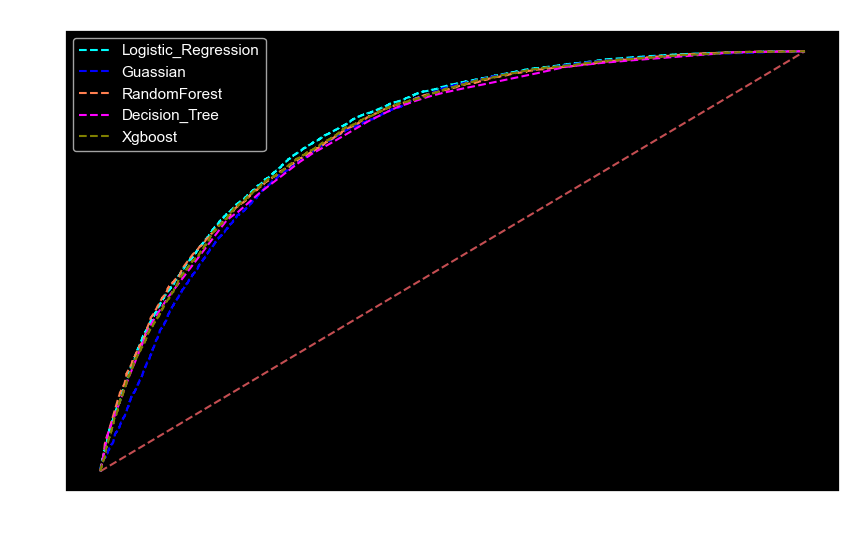

In [43]:
plt.figure(figsize=(10,6))
plt.style.use("dark_background")
#ROC curve for TPR=FPR
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
colors = ['#00FFFF', '#0000FF', '#FF7F50','#FF00FF','#808000','#9A0EEA']
plt.plot(p_fpr, p_tpr, linestyle='--', color='r')
for i in range(len(algos)):
    model = algos[i]
    startTime = time.time()
    model.fit(X_train,y_train)
    endTime = time.time()
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
    plt.plot(fpr, tpr, linestyle='--',color=colors[i], label=nameList[i])
    score= roc_auc_score(y_test,y_pred)
    rocList.append(score)
    timeList.append(endTime-startTime)
plt.title('ROC curve')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('10_model1_roc.png',dpi=300)
plt.show();

In [44]:
evaluation = pd.DataFrame({'Model': nameList,'Score':rocList, 'Time' : timeList  })
evaluation = evaluation.sort_values(by='Score', ascending=False)
evaluation

,Model,Score,Time
0,Logistic_Regression,0.812963,0.206065
2,RandomForest,0.808363,22.701648
4,Xgboost,0.806532,0.677821
3,Decision_Tree,0.800786,0.032666
1,Guassian,0.796576,0.010385


### Experiment 2 : Performance Without removing Outliers

In [45]:
ndf = X[X.columns[clf.feature_importances_ > 0.05]]
ndf.head()

,HighBP,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,1.0,26.0,3.0,5.0,30.0,4.0,6.0,8.0
1,1.0,26.0,3.0,0.0,0.0,12.0,6.0,8.0
2,0.0,26.0,1.0,0.0,10.0,13.0,6.0,8.0
3,1.0,28.0,3.0,0.0,3.0,11.0,6.0,8.0
4,0.0,29.0,2.0,0.0,0.0,8.0,5.0,8.0


In [46]:
ndf.loc[:,'Diabetes'] = y

In [47]:
#checking if dataframe has any missing values in any column
for column in ndf:
    print(f'{column:30} (NA/NULL): {ndf[column].isna().sum():8} /{ndf.shape[0]:7}')

HighBP                         (NA/NULL):        0 /  70692
BMI                            (NA/NULL):        0 /  70692
GenHlth                        (NA/NULL):        0 /  70692
MentHlth                       (NA/NULL):        0 /  70692
PhysHlth                       (NA/NULL):        0 /  70692
Age                            (NA/NULL):        0 /  70692
Education                      (NA/NULL):        0 /  70692
Income                         (NA/NULL):        0 /  70692
Diabetes                       (NA/NULL):        0 /  70692


In [48]:
NX = ndf.drop('Diabetes', axis=1)
Ny = ndf['Diabetes']

In [49]:
### Q2 : For Training I have Used 70 Percent and Testing I have used 30 Percent of data set with Random Sampling.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(NX, Ny, test_size=0.3, random_state=42)
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (49484, 8)
Shape of the y_train (49484,)
Shape of the X_test (21208, 8)
Shape of the y_test (21208,)


#### We have Used these Machine Learning models
    - LogisticRegression 
    - GaussianNB
    - ExtraTreeClassifier
    - RandomForestClassifier
    - DecisionTreeClassifier
    - XGBClassifier

In [51]:
algos = [LogisticRegression(solver='lbfgs',max_iter=7600), 
         GaussianNB(),
         RandomForestClassifier(max_depth=5,n_estimators=1000, max_features=10, class_weight='balanced'),
         DecisionTreeClassifier(max_depth=5),
         XGBClassifier(max_depth=4, n_estimators=500,use_label_encoder=False,),]

nameList = ['Logistic_Regression','Guassian','RandomForest','Decision_Tree', 'Xgboost']
rocList = []
timeList = []

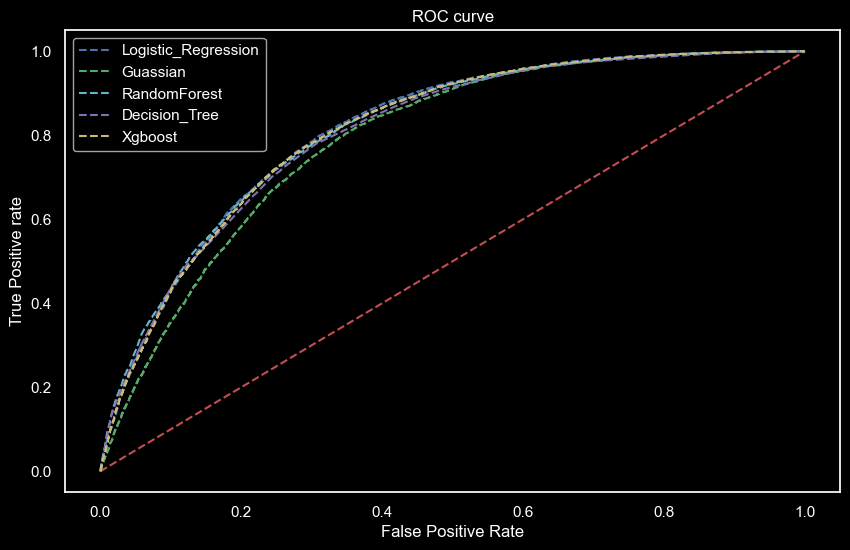

In [52]:
plt.figure(figsize=(10,6))
plt.style.use("dark_background")

#ROC curve for TPR=FPR
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
colors = ['b','g','c','m','y']
plt.plot(p_fpr, p_tpr, linestyle='--', color='r')
for i in range(len(algos)):
    model = algos[i]
    startTime = time.time()
    model.fit(X_train,y_train)
    endTime = time.time()
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
    plt.plot(fpr, tpr, linestyle='--',color=colors[i], label=nameList[i])
    score= roc_auc_score(y_test,y_pred)
    rocList.append(score)
    timeList.append(endTime-startTime)
plt.title('ROC curve')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('11_model2_roc.png',dpi=300)
plt.show();

In [53]:
evaluation = pd.DataFrame({'Model': nameList,'Score':rocList, 'Time' : timeList  })
evaluation = evaluation.sort_values(by='Score', ascending=False)
evaluation

,Model,Score,Time
0,Logistic_Regression,0.814224,0.716841
2,RandomForest,0.814070,32.934039
4,Xgboost,0.811598,1.007416
3,Decision_Tree,0.807740,0.049476
1,Guassian,0.790063,0.017840


### Conclusion :
    Even After analyzing all the factors that we can take while performing the analysis, We are able to get maximum accuracy from the Logistic_Regression classifier with an accuracy of 81.42%. The other two kernels (RandomForest, Xgboost) also performed well in our cases. The rest of the classifiers were not up to the mark with the accuracy that they achieved.
    